In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('hdfc5years.csv')

In [3]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2017-01-02,HDFC,EQ,1262.6,1272.0,1272.0,1213.70,1216.95,1217.10,1224.52,2369360,2.901333e+14,64113,1350679,0.5701
1,2017-01-03,HDFC,EQ,1217.1,1218.7,1222.6,1200.50,1212.10,1214.00,1214.18,3203369,3.889471e+14,99126,2164639,0.6757
2,2017-01-04,HDFC,EQ,1214.0,1215.8,1224.5,1197.25,1215.00,1212.10,1212.57,2805972,3.402433e+14,112395,1976521,0.7044
3,2017-01-05,HDFC,EQ,1212.1,1215.7,1220.4,1205.10,1215.00,1217.20,1213.85,3339784,4.054009e+14,201479,2550051,0.7635
4,2017-01-06,HDFC,EQ,1217.2,1219.0,1232.0,1218.80,1223.00,1222.35,1225.75,2774461,3.400785e+14,109327,2265699,0.8166


In [4]:

df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
1320,2022-05-04,HDFC,EQ,2264.00,2271.30,2278.0,2192.00,2209.30,2206.95,2242.40,4754704,1.066193e+15,221302,3029406,0.6371
1321,2022-05-05,HDFC,EQ,2206.95,2230.35,2251.9,2207.00,2215.55,2215.40,2228.94,2661611,5.932563e+14,93119,1590663,0.5976
1322,2022-05-06,HDFC,EQ,2215.40,2170.00,2190.0,2142.75,2159.00,2150.65,2160.17,3862931,8.344598e+14,176903,2396534,0.6204
1323,2022-05-09,HDFC,EQ,2150.65,2115.00,2181.0,2113.60,2170.20,2168.30,2148.80,3969231,8.529090e+14,163188,2450142,0.6173
1324,2022-05-10,HDFC,EQ,2168.30,2163.45,2221.8,2160.25,2200.00,2201.30,2200.26,4205193,9.252533e+14,172317,2558844,0.6085


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0       1217.10
1       1214.00
2       1212.10
3       1217.20
4       1222.35
         ...   
1320    2206.95
1321    2215.40
1322    2150.65
1323    2168.30
1324    2201.30
Name: Close, Length: 1325, dtype: float64

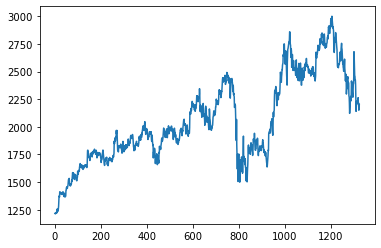

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

## LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

LSTM is very sensitive to the scale of the data, Here the scale of the Close value is in a kind of scale, we should always try to transform the value.

Here we will use min-max scalar to transform the values from 0 to 1.We should reshape so that we can use fit transform

In [8]:
import numpy as np
df1

0       1217.10
1       1214.00
2       1212.10
3       1217.20
4       1222.35
         ...   
1320    2206.95
1321    2215.40
1322    2150.65
1323    2168.30
1324    2201.30
Name: Close, Length: 1325, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
print(df1)

[[0.00279525]
 [0.00106219]
 [0.        ]
 ...
 [0.52469602]
 [0.53456324]
 [0.55301188]]


Train and Test Split

in time-series data the one data is dependent on other data. The training size should be 65% of the total length of the data frame, the test size should be the difference between the length of the dataset and the training size.

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(861, 464)

In [13]:
train_data

array([[0.00279525],
       [0.00106219],
       [0.        ],
       [0.00285115],
       [0.00573026],
       [0.00640112],
       [0.00287911],
       [0.01003494],
       [0.00503145],
       [0.01979036],
       [0.02504542],
       [0.01883997],
       [0.02065688],
       [0.0169392 ],
       [0.01408805],
       [0.02663871],
       [0.03837876],
       [0.07004892],
       [0.09034242],
       [0.08933613],
       [0.08595388],
       [0.11180992],
       [0.10577219],
       [0.10361985],
       [0.10521314],
       [0.10909853],
       [0.10566038],
       [0.10331237],
       [0.0986443 ],
       [0.10060098],
       [0.10401118],
       [0.10457023],
       [0.10143955],
       [0.10644305],
       [0.10129979],
       [0.11200559],
       [0.10174703],
       [0.09705101],
       [0.09146052],
       [0.08830189],
       [0.1053529 ],
       [0.10448637],
       [0.08894479],
       [0.08600978],
       [0.08570231],
       [0.08698812],
       [0.08911251],
       [0.090

Now consider the time steps, if I want to predict the price of the stock in a day that how previous data should be considered.

Now the timestep value will be 100. Let’s split the data X, Y. In the 0th iteration the first 100 elements goes as your first record and the 101 elements will be put up in the X. The 100 elements will be put up in the Y.

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [15]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [16]:
print(X_train.shape), print(y_train.shape)

(760, 100)
(760,)


(None, None)

In [17]:
print(X_test.shape), print(ytest.shape)

(363, 100)
(363,)


(None, None)

In [18]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

LSTM

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is that LSTM can store past important information and forget the information that is not.
LSTM has three gates:

The input gate: The input gate adds information to the cell state,
The forget gate: It removes the information that is no longer required by the model,
The output gate: Output Gate at LSTM selects the information to be shown as output.
 
 

While Implementing any LSTM, we should always reshape our X train in 3-D, add 1 the reason behind is the time step and the 1 is given to the LSTM.



In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 5s 161ms/step - loss: 0.0497 - val_loss: 0.0537
Epoch 2/100
12/12 [==============================] - 1s 91ms/step - loss: 0.0084 - val_loss: 0.0084
Epoch 3/100
12/12 [==============================] - 1s 90ms/step - loss: 0.0051 - val_loss: 0.0291
Epoch 4/100
12/12 [==============================] - 1s 87ms/step - loss: 0.0037 - val_loss: 0.0175
Epoch 5/100
12/12 [==============================] - 1s 98ms/step - loss: 0.0032 - val_loss: 0.0068
Epoch 6/100
12/12 [==============================] - 1s 94ms/step - loss: 0.0027 - val_loss: 0.0069
Epoch 7/100
12/12 [==============================] - 1s 93ms/step - loss: 0.0024 - val_loss: 0.0047
Epoch 8/100
12/12 [==============================] - 1s 96ms/step - loss: 0.0023 - val_loss: 0.0040
Epoch 9/100
12/12 [==============================] - 1s 92ms/step - loss: 0.0022 - val_loss: 0.0037
Epoch 10/100
12/12 [==============================] - 1s 94ms/step - loss: 0.0020 - val_loss: 0.004

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

12/12 [==============================] - 0s 15ms/step


In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1919.2734953215365

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2537.8632261289536

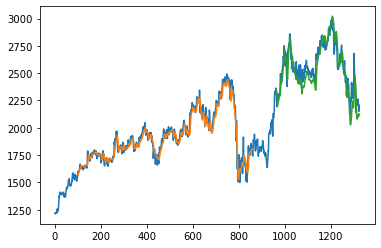

In [30]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Green indicates the Predicted Data

Blue indicates the Complete Data

Orange indicates the Train Data

In [31]:
len(test_data)

464

In [32]:
x_input=test_data[364:].reshape(1,-1)
x_input.shape

(1, 100)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input

[0.8608525506638712,
 0.8439972047519219,
 0.8315863032844165,
 0.7856044723969252,
 0.7481201956673657,
 0.742837176799441,
 0.7418029350104821,
 0.7597763801537386,
 0.7393151642208248,
 0.752900069881202,
 0.7565338923829489,
 0.755527603074773,
 0.7556114605171208,
 0.7683298392732355,
 0.7962543675751222,
 0.8180013976240393,
 0.817078965758211,
 0.7873095737246681,
 0.7740600978336826,
 0.8092522711390636,
 0.8379315164220823,
 0.85277428371768,
 0.8631167016072677,
 0.8387700908455625,
 0.8333193570929419,
 0.8108455625436758,
 0.7872257162823201,
 0.75874213836478,
 0.7719636617749824,
 0.7422501747030049,
 0.7371069182389937,
 0.7218728162124387,
 0.7292243186582809,
 0.7317400419287211,
 0.7565338923829489,
 0.7831446540880501,
 0.7355415793151644,
 0.7218169112508735,
 0.6798322851153041,
 0.6722571628232005,
 0.6838574423480083,
 0.7068902865129282,
 0.6788259958071278,
 0.6064011180992314,
 0.6306918238993712,
 0.6438853948287909,
 0.6706918238993712,
 0.687099930118798,
 

In [35]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.48528466]
101
1 day input [0.8439972  0.8315863  0.78560447 0.7481202  0.74283718 0.74180294
 0.75977638 0.73931516 0.75290007 0.75653389 0.7555276  0.75561146
 0.76832984 0.79625437 0.8180014  0.81707897 0.78730957 0.7740601
 0.80925227 0.83793152 0.85277428 0.8631167  0.83877009 0.83331936
 0.81084556 0.78722572 0.75874214 0.77196366 0.74225017 0.73710692
 0.72187282 0.72922432 0.73174004 0.75653389 0.78314465 0.73554158
 0.72181691 0.67983229 0.67225716 0.68385744 0.70689029 0.678826
 0.60640112 0.63069182 0.64388539 0.67069182 0.68709993 0.68466806
 0.69425577 0.68480783 0.63225716 0.66484976 0.64424878 0.59594689
 0.59309574 0.56206848 0.50865129 0.52528302 0.54915444 0.57350105
 0.5690566  0.59460517 0.57512229 0.60377358 0.67262055 0.65956674
 0.66563242 0.63407407 0.6140601  0.60986723 0.59044025 0.62907058
 0.65596087 0.65872816 0.69333333 0.82065688 0.78915444 0.74015374
 0.69914745 0.69665968 0.67790356 0.67846261 0.65207547 0.58778477
 0.51885395 0.54121593 0.56941999 0.

In [36]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [37]:
len(df1)

1325

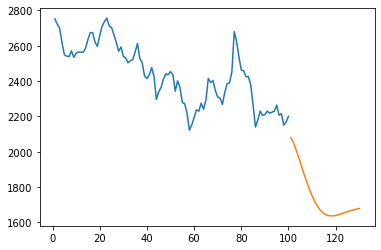

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[1225:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

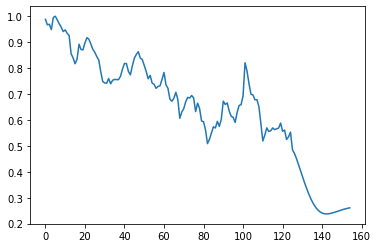

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

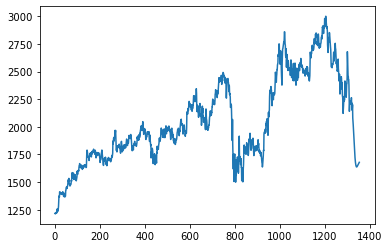

In [40]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)